Analisando o Desempenho das Ações da NVIDIA Corporation: 1 de Janeiro de 2020 a 5 de Maio de 2024

Visão Geral

Este estudo examina o desempenho das ações da NVIDIA Corporation de 1 de janeiro de 2020 a 5 de maio de 2024. Ao analisar dados históricos de ações, nosso objetivo é descobrir tendências no desempenho financeiro da NVIDIA, avaliar a volatilidade do mercado e identificar fatores-chave que influenciaram o preço das ações durante este período.

Descrições das Colunas:

- **Date**: A data em que os dados da ação foram registrados;
- **Open**: Preço de abertura da ação da NVIDIA na data especificada;
- **High**: O preço mais alto alcançado pela ação da NVIDIA durante o dia de negociação;
- **Low**: O preço mais baixo da ação da NVIDIA durante o dia de negociação;
- **Close**: Preço de fechamento da ação da NVIDIA na data especificada;
- **Volume**: O número de ações negociadas na data especificada.

In [37]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [38]:
def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(start=start_date, end=end_date)
    return stock_data

In [39]:
# Loading Data
ticker = "NVDA"  # Nvidia ticker
start_date = "2020-01-01"
end_date = "2024-05-13" 
stock_data = get_stock_data(ticker, start_date, end_date)
stock_data.reset_index(inplace=True)
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')
nvidia = pd.DataFrame(stock_data)

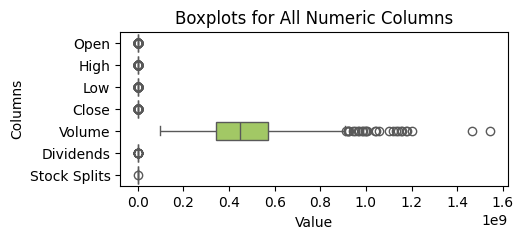

In [47]:
# Plotting boxplot to check for outliers

plt.figure(figsize=(5,2))  
sns.boxplot(data=nvidia, orient="h", palette="Set2")  
plt.title('Boxplots for All Numeric Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()

In [49]:
# Using IQR Method
Q1 = nvidia['Volume'].quantile(0.25)
Q3 = nvidia['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
nvidia_new = nvidia[(nvidia['Volume'] >= lower_bound) & (nvidia['Volume'] <= upper_bound)]

In [42]:
# Converting Date Column to datetime Format
nvidia_new['Date'] = pd.to_datetime(nvidia_new['Date'])
nvidia_new.set_index('Date', inplace=True)

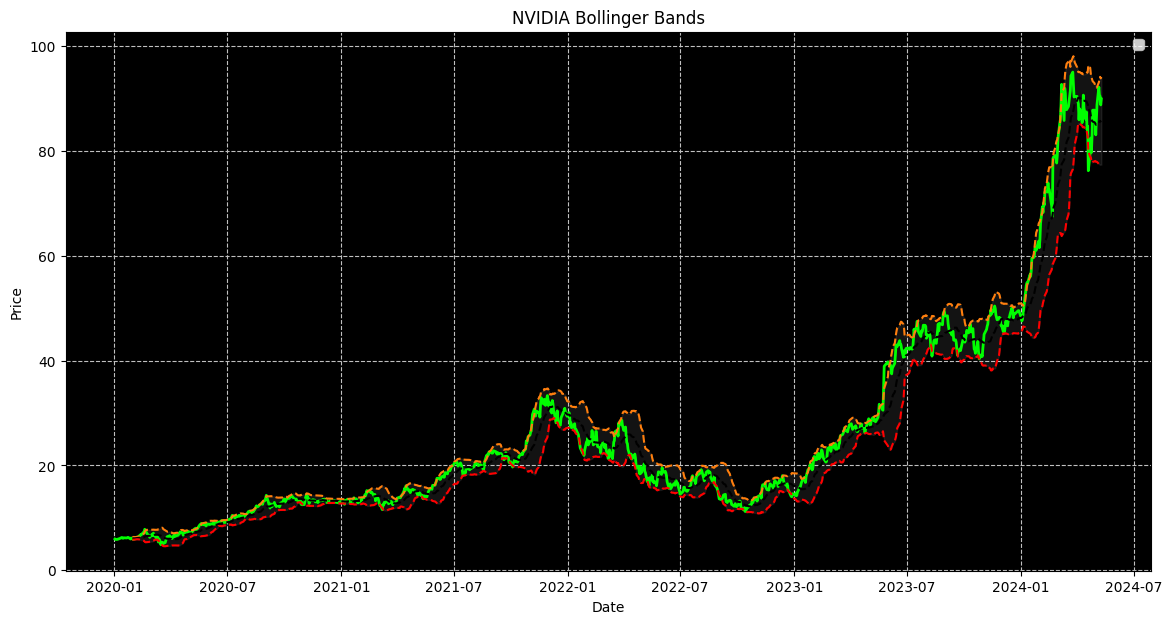

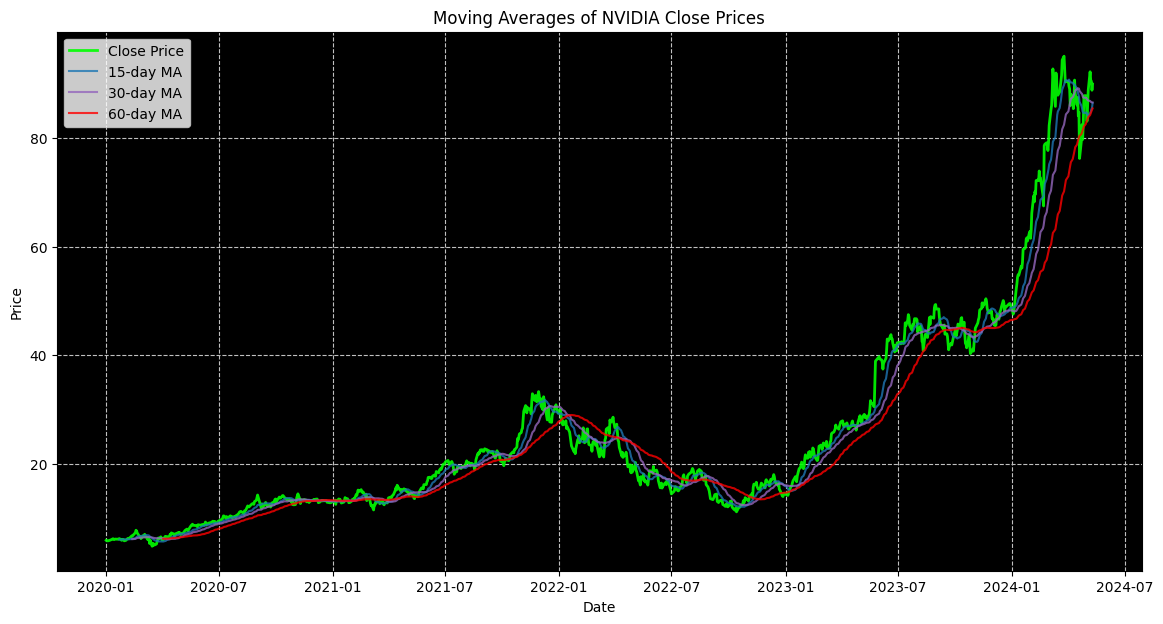

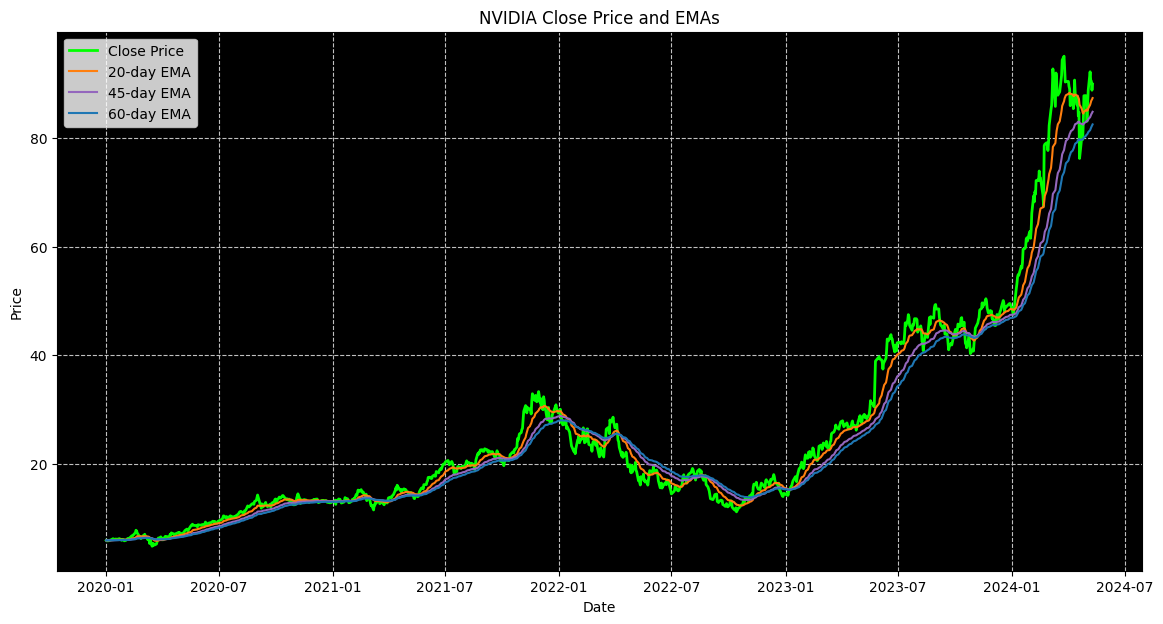

In [43]:
colors = {
    'green': '#00ff00',
    'orange': '#ff7f0e',
    'black': '#000000',
    'red': '#ff0000',
    'blue': '#1f77b4',
    'violet': '#9467bd',
    'grey': '#c0c0c0'
}

def setup_plot(title, xlabel, ylabel):
    plt.figure(figsize=(14, 7))
    plt.title(title, color=colors['black'])
    plt.xlabel(xlabel, color=colors['black'])
    plt.ylabel(ylabel, color=colors['black'])
    plt.grid(True, linestyle='--', color=colors['grey'])
    plt.gca().set_facecolor(colors['black'])
    plt.legend()

# Bollinger Bands
nvidia_new['Middle Band'] = nvidia_new['Close'].rolling(window=20).mean()
nvidia_new['Std Dev'] = nvidia_new['Close'].rolling(window=20).std()
nvidia_new['Upper Band'] = nvidia_new['Middle Band'] + (nvidia_new['Std Dev'] * 2)
nvidia_new['Lower Band'] = nvidia_new['Middle Band'] - (nvidia_new['Std Dev'] * 2)

setup_plot('NVIDIA Bollinger Bands', 'Date', 'Price')
plt.plot(nvidia_new.index, nvidia_new['Close'], label='Close Price', color=colors['green'], linewidth=2)
plt.plot(nvidia_new.index, nvidia_new['Upper Band'], label='Upper Band', color=colors['orange'], linestyle='--')
plt.plot(nvidia_new.index, nvidia_new['Middle Band'], label='Middle Band', color=colors['black'], linestyle='--')
plt.plot(nvidia_new.index, nvidia_new['Lower Band'], label='Lower Band', color=colors['red'], linestyle='--')
plt.fill_between(nvidia_new.index, nvidia_new['Upper Band'], nvidia_new['Lower Band'], color=colors['grey'], alpha=0.1)
plt.show()

# Moving Averages (MAs)
windows = [15, 30, 60]
labels = ['15-day MA', '30-day MA', '60-day MA']
color_map = [colors['blue'], colors['violet'], colors['red']]

plt.figure(figsize=(14, 7))
plt.title('Moving Averages of NVIDIA Close Prices', color=colors['black'])
plt.xlabel('Date', color=colors['black'])
plt.ylabel('Price', color=colors['black'])
plt.grid(True, linestyle='--', color=colors['grey'])
plt.gca().set_facecolor(colors['black'])
plt.plot(nvidia_new.index, nvidia_new['Close'], label='Close Price', color=colors['green'], alpha=0.9, linewidth=2)

for window, label, clr in zip(windows, labels, color_map):
    nvidia_new[f'MA_{window}'] = nvidia_new['Close'].rolling(window=window).mean()
    plt.plot(nvidia_new.index, nvidia_new[f'MA_{window}'], label=label, color=clr, alpha=0.8)

plt.legend()
plt.show()


#  EMAs
plt.figure(figsize=(14, 7))
plt.title('NVIDIA Close Price and EMAs', color=colors['black'])
plt.xlabel('Date', color=colors['black'])
plt.ylabel('Price', color=colors['black'])
plt.grid(True, linestyle='--', color=colors['grey'])
plt.gca().set_facecolor(colors['black'])

spans = [20, 45, 60]
labels = ['20-day EMA', '45-day EMA', '60-day EMA']
color_map = [colors['orange'], colors['violet'], colors['blue']]
plt.plot(nvidia_new.index, nvidia_new['Close'], label='Close Price', color=colors['green'], linewidth=2)

for span, label, clr in zip(spans, labels, color_map):
    nvidia_new[f'EMA_{span}'] = nvidia_new['Close'].ewm(span=span, adjust=False).mean()
    plt.plot(nvidia_new.index, nvidia_new[f'EMA_{span}'], label=label, color=clr)
plt.legend()
plt.show()

Os três gráficos exibem diferentes aspectos dos preços de ações da NVIDIA ao longo do tempo, cada um utilizando distintas ferramentas de análise técnica que incluem Bollinger Bands, médias móveis simples e médias móveis exponenciais (EMAs). Os insights de cada gráfico:

1. **Bollinger Bands**:
   - O primeiro gráfico utilizando Bollinger Bands revelou períodos de alta volatilidade e tendências potenciais de compra ou venda com base nas aproximações das faixas superior e inferior. Este método mostrou ser particularmente útil para identificar pontos extremos de movimentos de preço, sugerindo oportunidades de entrada e saída baseadas em condições de sobrecompra ou sobrevenda.

2. **Médias Móveis Simples**:
   - O segundo gráfico com médias móveis simples de 15, 30 e 60 dias ilustrou a eficácia dessas médias na identificação da direção da tendência ao longo de diferentes períodos. As médias móveis ajudaram a suavizar a volatilidade do preço diário e forneceram uma visão clara das tendências ascendentes e dos períodos de consolidação, facilitando a compreensão da dinâmica de preços em termos de curto a longo prazo.

3. **Médias Móveis Exponenciais (EMAs)**:
   - O terceiro gráfico com EMAs de 20, 45 e 60 dias destacou a utilidade das médias móveis exponenciais para reagir mais prontamente às mudanças de preço recentes, comparadas às médias móveis simples. As EMAs forneceram sinais mais sensíveis e imediatos sobre mudanças nas tendências de preço, o que é crucial para investidores que buscam aproveitar movimentos rápidos do mercado.

### Conclusão Geral:
Cada ferramenta de análise técnica apresentada nos gráficos tem suas vantagens específicas e pode ser usada para diferentes estratégias de investimento. Enquanto as Bollinger Bands são excelentes para identificar a volatilidade e pontos de extremidade de preço, as médias móveis (tanto simples quanto exponenciais) são eficazes para determinar a direção da tendência e oferecer sinais de negociação baseados em cruzamentos de médias de diferentes períodos.

Para investidores e traders, a combinação dessas ferramentas proporciona uma abordagem robusta para a análise técnica, permitindo uma avaliação mais completa do mercado e ajudando a tomar decisões informadas de compra e venda. A escolha da ferramenta ou da combinação de ferramentas dependerá do estilo de investimento, dos objetivos de investimento e do horizonte de tempo de cada investidor.